###Importing the libraries

In [276]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [277]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

###Downloading stopwords

In [278]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [279]:
stop_words = stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

###Importing the dataset

In [280]:
dataset = pd.read_csv('/content/mental_health_combined_test.csv')

In [281]:
dataset.head()

,text,status
0,i don't understand whats wrong with me. i don'...,Anxiety
1,usually when i have anxiety just chatting with...,Anxiety
2,"well, i've had anxiety and panic syndrome for ...",Anxiety
3,"for the most minimal of things, like standing ...",Anxiety
4,i stay away from family and live with my roomm...,Anxiety


In [282]:
dataset.tail()

,text,status
987,Someone jumped off my building todayI wonder w...,Suicidal
988,helpp??? took 2800mg ibuprofen &amp; 1800mg as...,Suicidal
989,I flunked all my exams am gonna suicideAm goin...,Suicidal
990,I've Got A Serious ProblemI am considering tak...,Suicidal
991,"Built the noose, taking a nap to see if it is ...",Suicidal


###Basic EDA

In [283]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    992 non-null    object
 1   status  992 non-null    object
dtypes: object(2)
memory usage: 15.6+ KB


In [284]:
dataset.shape

(992, 2)

In [285]:
dataset.describe()

,text,status
count,992,992
unique,992,4
top,all I can think about is SuicideI can’t feel a...,Anxiety
freq,1,248


In [286]:
data_type = dataset.dtypes
print(data_type)

text      object
status    object
dtype: object


In [287]:
dupilicates = dataset.duplicated().sum()
print(f"The number of dupilicates are: {dupilicates}")

The number of dupilicates are: 0


In [288]:
print(pd.isnull(dataset).sum())

text      0
status    0
dtype: int64


In [289]:
count = dataset['status'].value_counts()
print(count)

status
Anxiety       248
Depression    248
Normal        248
Suicidal      248
Name: count, dtype: int64


In [290]:
ratio = count.max()/count.min()
print(ratio)
if ratio <=1.5:
  print("The dataset is balanced")
elif ratio <=3:
  print("The dataset is sligthly imbalanced")
else:
  print("The dataset is highly imbalanced")

1.0
The dataset is balanced


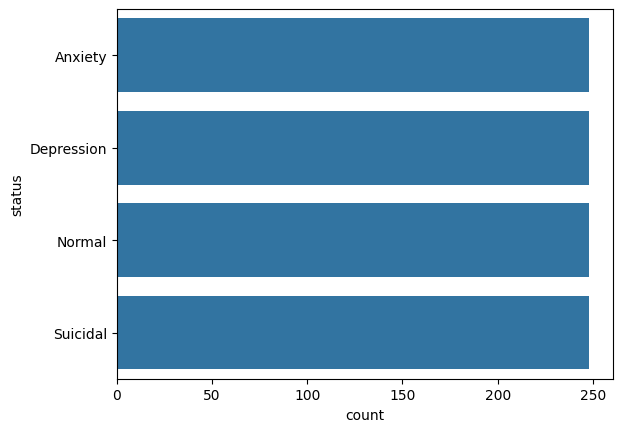

In [291]:
sns.countplot(y = 'status', data = dataset)
plt.show()

###Clean the text

In [292]:
def clean_text(text):
  text = re.sub('https/S+', " ", text)
  text = re.sub('@\w+', " ", text)
  text = re.sub('#', " ", text)
  text = re.sub(' /s+', " ", text)
  return text

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-1894555554.py:3: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('@\w+', " ", text)


###Features and target

In [293]:
x = dataset['text']
y = dataset['status']

In [294]:
x.head()

,text
0,i don't understand whats wrong with me. i don'...
1,usually when i have anxiety just chatting with...
2,"well, i've had anxiety and panic syndrome for ..."
3,"for the most minimal of things, like standing ..."
4,i stay away from family and live with my roomm...


In [295]:
y.head()

,status
0,Anxiety
1,Anxiety
2,Anxiety
3,Anxiety
4,Anxiety


###Stemming

In [296]:
stemming = PorterStemmer()

In [297]:
def text_stemming(text):
  text_input = re.sub('[^a-zA-Z]', " ", text)
  text_input = text_input.lower()
  words = text_input.split()

  stemmed_text = []
  for word in words:
    if word not in stop_words:
      stemmed_text.append(stemming.stem(word))

  stemmed_text = " ".join(stemmed_text)
  return stemmed_text

###Applying stemming

In [298]:
x = x.apply(clean_text)
x = x.apply(text_stemming)

In [299]:
x

,text
0,understand what wrong know freak sometim like ...
1,usual anxieti chat someon someon physic need s...
2,well anxieti panic syndrom year start school b...
3,minim thing like stand someon way moment anyon...
4,stay away famili live roommat liter game fucki...
...,...
987,someon jump build todayi wonder like
988,helpp took mg ibuprofen amp mg aspirin gt took...
989,flunk exam gonna suicideam go back home garag ...
990,got seriou problemi consid take life know scar...


###Converting features into array

In [300]:
X = x.values

In [301]:
X

array(['understand what wrong know freak sometim like right lay bed noth happen keep tear run face stupid honestli fine noth wrong earth like',
       'usual anxieti chat someon someon physic need start feel better anxieti alway worst night shitti feel know girlfriend liter share bed still feel like complet alon want reach wake feel like nuisanc guy sleep anxieti talk anyon asleep usual end suffer silenc sun come girlfriend wake feel comfort tire enough go sleep ig weird sleep unless first one fall asleep',
       'well anxieti panic syndrom year start school back heart went insan reason got bad ask dad pick went hospit blood pressur high year pass sympton got way wors bad drop stori',
       'minim thing like stand someon way moment anyon els notic charact trait habit subconsci quirk think deep legitim believ inconvenienc peopl say',
       'stay away famili live roommat liter game fuckin time like happi go colleg anymor bless interest stuck head day pandem realli make wors need distr

In [302]:
Y = y.values

In [303]:
Y

array(['Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety',
       'Anxiety', 'Anxiety', 'Anxiety', 'Anxiety', 

###Converting textual data into feature vectors

In [304]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.8
)
vectorizer.fit(X)
X = vectorizer.transform(X)

###Splitting the data into train and test

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

###Models training

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logestic Regression': LogisticRegression(C=0.1, max_iter=1000,random_state=42,class_weight="balanced"),
    'Support Vector Machine': SVC(C=0.1, kernel='rbf', random_state=42, class_weight="balanced"),
    'Random Forest': RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=42),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=42)
}

In [307]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for model_name, model in models.items():

  print("------- MODEL TRAINING ---------------")
  print(f"Training {model_name}")
  model.fit(X_train, Y_train)
  print(f"{model_name} successfully trained!")

  print("---------- TRAINING SET RESULTS -------------")
  print(f"Training results of: {model_name}")
  y_train_pred = model.predict(X_train)
  train_accuracy = accuracy_score(Y_train, y_train_pred)
  train_precision = precision_score(Y_train, y_train_pred, average='weighted')
  train_recall = recall_score(Y_train, y_train_pred, average='weighted')
  train_f1 = f1_score(Y_train, y_train_pred, average='weighted')

  print(f"Accuracy: {train_accuracy}")
  print(f"Precision: {train_precision}")
  print(f"Recall: {train_recall}")
  print(f"F1 Score: {train_f1}")

  print("------------ TEST SET RESULTS ----------------")
  print(f"Predicting {model_name}")
  y_pred = model.predict(X_test)
  print(f"{model_name} successfully predicted!")
  test_accuracy = accuracy_score(Y_test, y_pred)
  test_precision = precision_score(Y_test, y_pred, average='weighted')
  test_recall = recall_score(Y_test, y_pred, average='weighted')
  test_f1 = f1_score(Y_test, y_pred, average='weighted')

  print(f"Accuracy: {test_accuracy}")
  print(f"Precision: {test_precision}")
  print(f"Recall: {test_recall}")
  print(f"F1 Score: {test_f1}")

  print("================================================")

------- MODEL TRAINING ---------------
Training Logestic Regression
Logestic Regression successfully trained!
---------- TRAINING SET RESULTS -------------
Training results of: Logestic Regression
Accuracy: 0.8663303909205549
Precision: 0.8716714304135937
Recall: 0.8663303909205549
F1 Score: 0.8660256925672335
------------ TEST SET RESULTS ----------------
Predicting Logestic Regression
Logestic Regression successfully predicted!
Accuracy: 0.6432160804020101
Precision: 0.6417873232537415
Recall: 0.6432160804020101
F1 Score: 0.6326645556363607
------- MODEL TRAINING ---------------
Training Support Vector Machine
Support Vector Machine successfully trained!
---------- TRAINING SET RESULTS -------------
Training results of: Support Vector Machine


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.2484237074401009
Precision: 0.30795762030568485
Recall: 0.2484237074401009
F1 Score: 0.10555402245660513
------------ TEST SET RESULTS ----------------
Predicting Support Vector Machine
Support Vector Machine successfully predicted!
Accuracy: 0.27638190954773867
Precision: 0.0763869599252544
Recall: 0.27638190954773867
F1 Score: 0.11969295295374512
------- MODEL TRAINING ---------------
Training Random Forest
Random Forest successfully trained!
---------- TRAINING SET RESULTS -------------
Training results of: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
------------ TEST SET RESULTS ----------------
Predicting Random Forest
Random Forest successfully predicted!
Accuracy: 0.6130653266331658
Precision: 0.6167360008324182
Recall: 0.6130653266331658
F1 Score: 0.609347024767698
------- MODEL TRAINING ---------------
Training Decision Tree
Decision Tree successfully trained!
---------- TRAINING SET RESULTS -------------
Training results of: Decision Tree


###Check overfit

In [313]:
for model_name, model in models.items():

    print(f"Checking fit for {model_name}")

    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)
    gap = train_score - test_score

    print(f"Train score: {train_score:.2f}")
    print(f"Test score : {test_score:.2f}")
    print(f"Gap: {gap:.2f}")

    if train_score < 0.6 and test_score < 0.6:
        print("model: Underfitting")
    elif gap <= 0.07:
        print("model: Good fit!")
    elif gap <= 0.15:
        print("model: Slight overfitting")
    else:
        print("model: Overfitting")

    print("----------------------------------------")


Checking fit for Logestic Regression
Train score: 0.87
Test score : 0.64
Gap: 0.22
model: Overfitting
----------------------------------------
Checking fit for Support Vector Machine
Train score: 0.25
Test score : 0.28
Gap: -0.03
model: Underfitting
----------------------------------------
Checking fit for Random Forest
Train score: 1.00
Test score : 0.61
Gap: 0.39
model: Overfitting
----------------------------------------
Checking fit for Decision Tree
Train score: 1.00
Test score : 0.54
Gap: 0.46
model: Overfitting
----------------------------------------


###Final model

In [314]:
logestic_model = models['Logestic Regression']
log_pred = logestic_model.predict(X_test)

###Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=42)

###Confusion matrix

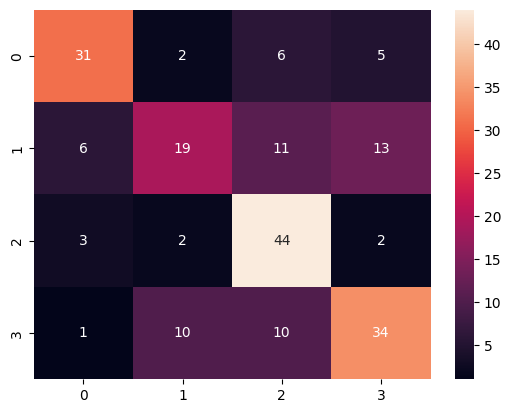

In [316]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, log_pred)
sns.heatmap(cm,annot=True)
plt.show()

###Classification report

In [317]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, log_pred))

              precision    recall  f1-score   support

     Anxiety       0.76      0.70      0.73        44
  Depression       0.58      0.39      0.46        49
      Normal       0.62      0.86      0.72        51
    Suicidal       0.63      0.62      0.62        55

    accuracy                           0.64       199
   macro avg       0.65      0.64      0.63       199
weighted avg       0.64      0.64      0.63       199



###K-fold cross validation

In [318]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logestic_model, X = X_train, y = Y_train, cv = 10)
print(accuracies)

[0.6875     0.5625     0.5875     0.72151899 0.6835443  0.72151899
 0.62025316 0.75949367 0.59493671 0.72151899]


###Accuracy

In [319]:
from sklearn.metrics import accuracy_score

acc = round(accuracy_score(Y_test, log_pred), 2) * 100
print("Accuracy:", acc)

Accuracy: 64.0


#MENTAL HEALTH TEXT CLASSIFICATION

In [322]:
input = ["i want to die thankyou for giving me this life mom and dad"]
input = clean_text(input[0])
input = text_stemming(input)
input = vectorizer.transform([input])
prediction = logestic_model.predict(input)
print(f"The mental health is: {prediction[0]}")

The mental health is: Suicidal
